# What Factors Affect the Ratings of Restaurants? 

### Xinyang Yang, Yiting Wang, Xianyuan Zhou

## 1. Data Set Description

These datasets are generated by  Rafael Ponce Medellín and Juan Gabriel González Serna from Department of Computer Science of National Center for Research and Technological Development CENIDET, México. <br><br>
These datasets include 9 csv files. Five csv files are restaurants informations: 
<ol><li> restaurant payment methods acceptance, </li><li> restaurant cuisine, </li><li> opening hours, </li><li> parking information, </li><li> geographic information.
 <br> For these five datasets, each row is a unique restaurant (placeID).</li> </ol><br>
Three files are customer information: <ol><li>  customer cuisine, </li><li> customer payment methods, </li><li> customer profile.</li> </ol> <br>For these three datasets, each row is a unique customer (userID). <br><br>
And finally, there is a rating dataset. In the rating dataset, each row is a customer's rating towards one restaurant.The keys are userID + placeID. The column names are: userID, placeID, rating, food rating, service rating. <br><br>

Below are descriptions for the relevant columns in these 9 datasets: <br>
<ul><b>rating</b>: rating by customers, numeric, 3 values, [0,1,2] <br>
<b>food_Rating</b>: rating by customers, numeric, 3 values, [0,1,2] <br>
<b>service_Rating</b>: rating by customers, numeric, 3 values, [0,1,2] <br>
<b>Rcuisine</b>: type of restaurants main cuisine, like American, Mexican, Italian, Cafe-Coffee_Shop,etc. nominal, 103 types. <br>
<b>placeID</b>: a unique number for each restaurant.<br>
<b>userID</b>: a unique number for each user. <br>
<b>Rpayment</b>: payment method supported by restaurants, nominal, 12 values. <br>
<b>Upayment</b>：payment method customers chose, nominal, 12 values. <br>
<b>birth_year</b>: customers birth year. <br>
<b>budget</b>: the budget of each customer, nominal, 3 values, [medium,low,high]. <br>
<b>activity</b>: types of job status, nominal, 4 values [student, professional, unemployed, working-class] <br> </ul>


In [1]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading data
F1=pd.read_csv("chefmozaccepts.csv")
F2=pd.read_csv("chefmozcuisine.csv")
F3=pd.read_csv("chefmozhours4.csv")
F4=pd.read_csv("chefmozparking.csv")
F5=pd.read_csv("usercuisine.csv")
F6=pd.read_csv("userpayment.csv")
F7=pd.read_csv("userprofile.csv")
F8=pd.read_csv("geoplaces2.csv")
T=pd.read_csv("rating_final.csv")

In [3]:
print("There are {} restaurants with ratings.".format(len(T.placeID.unique())))
print("There are {} users who gave ratings.".format(len(T.userID.unique())))

There are 130 restaurants with ratings.
There are 138 users who gave ratings.


## 2. Data Preparation

Here we will use the data from F1, F2, F4, F5, F6, F7, F8, and T. We do not inlcude the opening hours of the restaurants since we do not think opening hours will affect the rating significantly. <br> 
We crosstab the datasets to turn the multiple categories of values in each column into individual columns. We then make sure that each categorical column has values of only 0 & 1. 

### 1) F1 Restaurant Payment

In [4]:
df1=F1.set_index('placeID').Rpayment.apply(pd.Series).stack()
Rpayment = pd.crosstab(df1.index.get_level_values(0),df1).rename_axis(None).rename_axis(None,1).reset_index()

In [5]:
Rpayment.rename(columns={'index':'placeID'}, inplace=True)

In [6]:
Rpayment.head(3)

,placeID,American_Express,Carte_Blanche,Diners_Club,Discover,Japan_Credit_Bureau,MasterCard-Eurocard,VISA,Visa,bank_debit_cards,cash,checks,gift_certificates
0,132002,1,0,1,0,0,1,0,1,0,0,0,0
1,132012,1,0,1,0,0,0,0,1,1,0,0,0
2,132019,1,0,1,0,0,1,0,1,0,0,0,0


In [7]:
F1 = Rpayment.copy()

### 2) F2 Restaurant Cuisine Type

In [8]:
NF2 = pd.read_csv("chefmozcuisine.csv")

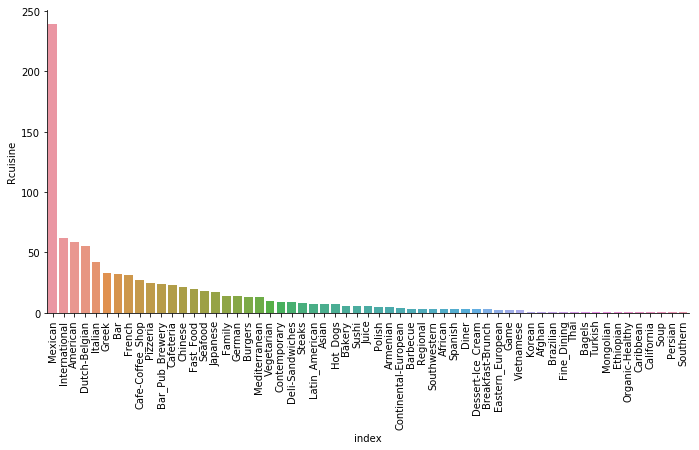

In [9]:
plot_data = NF2.Rcuisine.value_counts().to_frame().reset_index()
g = sns.catplot(x="index", y="Rcuisine",kind='bar', data=plot_data,aspect=2)
g.set_xticklabels(rotation=90)

In [10]:
NF2['Rcuisine_Clean'] = NF2.Rcuisine.apply(lambda x: 'Other' if x in \
                                          ['Continental-European', 'Regional', 'African', 'Barbecue','Dessert-Ice_Cream',\
                                           'Breakfast-Brunch', 'Diner', 'Southwestern','Spanish', 'Eastern_European', \
                                           'Game', 'Vietnamese', 'Organic-Healthy','Ethiopian', 'Fine_Dining', 'Turkish',\
                                           'Thai', 'Caribbean', 'Persian','Afghan', 'Bagels', 'Southern', 'Korean', \
                                           'Brazilian', 'Mongolian','Soup', 'California'] else x)

In [11]:
NF2.drop(columns = 'Rcuisine',inplace = True)

In [12]:
df1=NF2.set_index('placeID').Rcuisine_Clean.apply(pd.Series).stack()
Rcuisine_Clean = pd.crosstab(df1.index.get_level_values(0),df1).rename_axis(None).rename_axis(None,1).reset_index()

In [13]:
NF2 = Rcuisine_Clean.copy()

In [14]:
NF2.rename(columns={'index':'placeID'}, inplace=True)

In [15]:
NF2.Other = (NF2.Other > 0 )*1

In [16]:
NF2.head(3)

,placeID,American,Armenian,Asian,Bakery,Bar,Bar_Pub_Brewery,Burgers,Cafe-Coffee_Shop,Cafeteria,...,Latin_American,Mediterranean,Mexican,Other,Pizzeria,Polish,Seafood,Steaks,Sushi,Vegetarian
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3) F4 Parking_lot

In [17]:
F4['parking_Clean'] = F4.parking_lot.apply(lambda x: 'parking' if x in ['yes','public','street'] else x)

In [18]:
df1=F4.set_index('placeID').parking_Clean.apply(pd.Series).stack()
parking_lot = pd.crosstab(df1.index.get_level_values(0),df1).rename_axis(None).rename_axis(None,1).reset_index()

In [19]:
parking_lot.rename(columns={'index':'placeID'}, inplace=True)

In [20]:
parking_lot.parking = (parking_lot.parking > 0)*1

In [21]:
parking_lot.head(3)

,placeID,fee,none,parking,valet parking,validated parking
0,132012,0,0,1,0,0
1,132023,1,0,1,0,0
2,132024,0,0,1,0,0


In [22]:
F4 = parking_lot.copy()

### 4) F5 Use prefered cuisine type

In [23]:
F5['Rcuisine_Clean'] = F5.Rcuisine.apply(lambda x: 'Other' if x not in ['Mexican','American'] else x)

In [24]:
df1=F5.set_index('userID').Rcuisine_Clean.apply(pd.Series).stack()
Rcuisine = pd.crosstab(df1.index.get_level_values(0),df1).rename_axis(None).rename_axis(None,1).reset_index()

In [25]:
Rcuisine.rename(columns={'index':'userID'}, inplace=True)

In [26]:
Rcuisine.head(3)

,userID,American,Mexican,Other
0,U1001,1,0,0
1,U1002,0,1,0
2,U1003,0,1,0


In [27]:
F5 = Rcuisine.copy()

In [28]:
F5.Other = (F5.Other > 0)*1

### 5) F6 User Payment Type

In [29]:
h3=F6.set_index('userID').Upayment.apply(pd.Series).stack()
Upayment = pd.crosstab(h3.index.get_level_values(0),h3).rename_axis(None).rename_axis(None,1).reset_index()

In [30]:
Upayment.rename(columns={'index':'userID'}, inplace=True)

In [31]:
Upayment.head(3)

,userID,American_Express,MasterCard-Eurocard,VISA,bank_debit_cards,cash
0,U1001,0,0,0,0,1
1,U1002,0,0,0,0,1
2,U1003,0,0,0,0,1


In [32]:
F6 = Upayment.copy()

### 6) F7 User information

In [33]:
F7.columns

Index(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
       'birth_year', 'interest', 'personality', 'religion', 'activity',
       'color', 'weight', 'budget', 'height'],
      dtype='object')

In [34]:
F7['drink_level'] = F7.drink_level.apply(lambda x: 'drinker' if x not in ['abstemious'] else x)

In [35]:
F7['dress_preference'] = F7.dress_preference.apply(lambda x: 'formal' if x in ['elegant'] else x)

In [36]:
F7['transport'] = F7.transport.apply(lambda x: 'public' if x not in ['car owner'] else x)

In [37]:
NF7 = F7[['userID','smoker', 'drink_level','dress_preference', 'ambience', 'transport', 'marital_status', \
 'birth_year', 'interest', 'personality', 'religion', 'activity','budget']]

<i>Replace missing vale ('?') with most resonable value. e,g. highest occurrent value</i>

In [38]:
NF7.activity.replace('?','student',inplace=True)
NF7.budget.replace('?','medium',inplace=True)
NF7.dress_preference.replace('?','no preference',inplace=True)
NF7.ambience.replace('?','family',inplace=True)
NF7.transport.replace('?','public',inplace=True)
NF7.marital_status.replace('?','single',inplace=True)

In [39]:
NF7['smoker']= (F7['smoker']=='true') * 1

In [40]:
NF7 = pd.get_dummies(NF7,columns=['activity','budget','drink_level','dress_preference','ambience','transport',\
       'marital_status','interest','personality','religion'])

In [41]:
NF7.head(3)

,userID,smoker,birth_year,activity_professional,activity_student,activity_unemployed,activity_working-class,budget_high,budget_low,budget_medium,...,interest_variety,personality_conformist,personality_hard-worker,personality_hunter-ostentatious,personality_thrifty-protector,religion_Catholic,religion_Christian,religion_Jewish,religion_Mormon,religion_none
0,U1001,0,1989,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,U1002,0,1990,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,U1003,0,1989,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


### 7).i F8 Restaurant Information

In [42]:
F8.columns

Index(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address',
       'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')

In [43]:
NF8 = F8[['placeID', 'alcohol', 'smoking_area','dress_code', 'accessibility', 'price',\
          'Rambience', 'franchise', 'area']]

In [44]:
NF8 = pd.get_dummies(NF8,columns=['alcohol','dress_code', 'accessibility', 'price'])

In [45]:
NF8.smoking_area = (NF8.smoking_area == 'permitted')*1.0 + \
                (NF8.smoking_area == 'only at bar')*0.5 + (NF8.smoking_area == 'section')*0.5 \
                + (NF8.smoking_area == 'none')*0.5

In [46]:
NF8.Rambience = (NF8.Rambience == 'familiar')*1.0

In [47]:
NF8.franchise = (NF8.franchise == 'f')*1.0

In [48]:
NF8.area = (NF8.area == 'closed')*1.0

In [49]:
NF8.head(3)

,placeID,smoking_area,Rambience,franchise,area,alcohol_Full_Bar,alcohol_No_Alcohol_Served,alcohol_Wine-Beer,dress_code_casual,dress_code_formal,dress_code_informal,accessibility_completely,accessibility_no_accessibility,accessibility_partially,price_high,price_low,price_medium
0,134999,0.5,1.0,1.0,1.0,0,1,0,0,0,1,0,1,0,0,0,1
1,132825,0.5,1.0,1.0,0.0,0,1,0,0,0,1,1,0,0,0,1,0
2,135106,0.5,1.0,1.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1


### 7).ii Clustering Location

Based on the latitude and longitude information of restaurants from F8 dataset, we are able to find the locations of the restaurants.

In [50]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3,random_state=0)

In [51]:
location = F8[['latitude','longitude']]
clu.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [52]:
F8['location_cluster'] = clu.labels_

In [53]:
NF8['competitor'] = F8.groupby('location_cluster').placeID.transform('size')

In [54]:
F8.groupby('location_cluster').size()

location_cluster
0    84
1    23
2    23
dtype: int64

### 7).iii Location Plots

In [55]:
p1 = location[(location.latitude<20) & (location.longitude>-99.5)]
p2 = location[(location.latitude>23) & (location.longitude>-99.5)]
p3 = location[(location.latitude>22) & (location.latitude<23) & (location.longitude<-100.5)]

In [56]:
import folium
m = folium.Map(location=[location.latitude.mean(), location.longitude.mean()], zoom_start=6)
for i in range(0,len(location)):
    folium.Marker([location.latitude.iloc[i], location.longitude.iloc[i]]).add_to(m)
display(m)

In [57]:
m1 = folium.Map(location=[p1.latitude.mean()-0.05, p1.longitude.mean()], zoom_start=11)
for i in range(0,len(p1)):
    folium.Marker([p1.latitude.iloc[i], p1.longitude.iloc[i]]).add_to(m1)
display(m1)

In [58]:
m2 = folium.Map(location=[p2.latitude.mean(), p2.longitude.mean()], zoom_start=12.5)
for i in range(0,len(p2)):
    folium.Marker([p2.latitude.iloc[i], p2.longitude.iloc[i]]).add_to(m2)
display(m2)

In [59]:
m3 = folium.Map(location=[p3.latitude.mean(), p3.longitude.mean()], zoom_start=12)
for i in range(0,len(p3)):
    folium.Marker([p3.latitude.iloc[i], p3.longitude.iloc[i]]).add_to(m3)
display(m3)

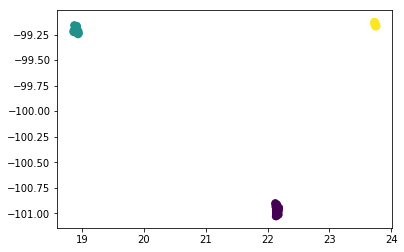

In [60]:
import matplotlib.pyplot as plt
y_kmeans = clu.predict(location)
plt.scatter(location.iloc[:, 0], location.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

### 8) Merge All Data File

Merge all the crosstabed datasets into one dataset, based on placeID and userID. The final dataset is a dataset with each row representing the rating of a customer to a restaurant. The keys are userID and place ID.  

In [61]:
R1 = pd.merge(F1,NF2,how='outer',on=['placeID'])

In [62]:
R3 = pd.merge(R1,F4,how='outer',on=['placeID'])

In [63]:
R = pd.merge(R3,NF8,how='outer',on=['placeID'])

In [64]:
U1 = pd.merge(F5,F6,how='outer',on=['userID'])

In [65]:
U = pd.merge(U1,NF7,how='outer',on=['userID'])

In [66]:
T.head(3)

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2


In [67]:
df1 = pd.merge(U,T,how='inner',on=['userID'])

In [68]:
df = pd.merge(df1,R,how='inner',on=['placeID'])

In [69]:
df.head(3)

,userID,American_x,Mexican_x,Other_x,American_Express_x,MasterCard-Eurocard_x,VISA_x,bank_debit_cards_x,cash_x,smoker,...,dress_code_casual,dress_code_formal,dress_code_informal,accessibility_completely,accessibility_no_accessibility,accessibility_partially,price_high,price_low,price_medium,competitor
0,U1001,1,0,0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,84.0
1,U1005,1,0,0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,84.0
2,U1014,0,0,1,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,84.0


### 9) Visualize Data

In [70]:
data_types = df.dtypes

In [71]:
cols = list(data_types.index)
cols.remove('userID')
cols.remove('placeID')

In [72]:
len(cols)

114

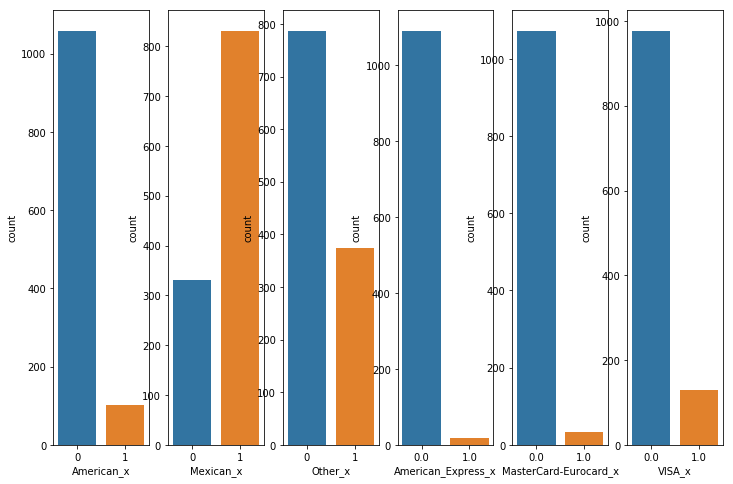

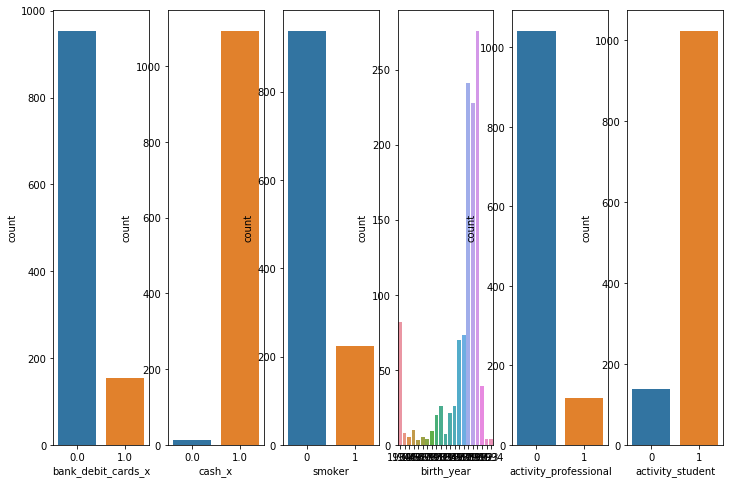

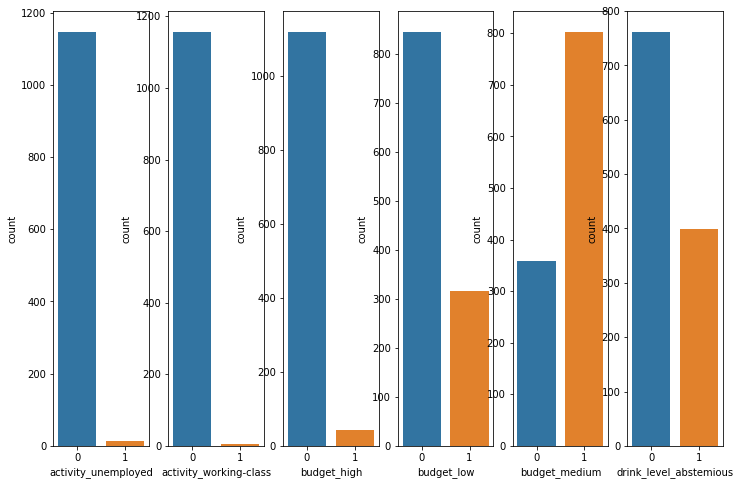

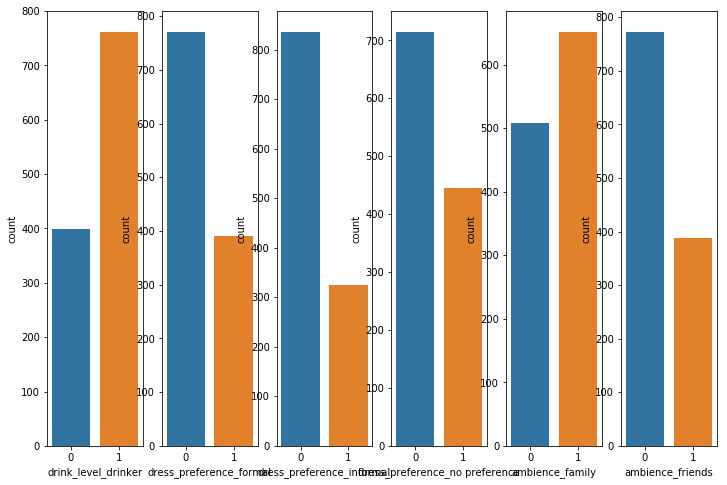

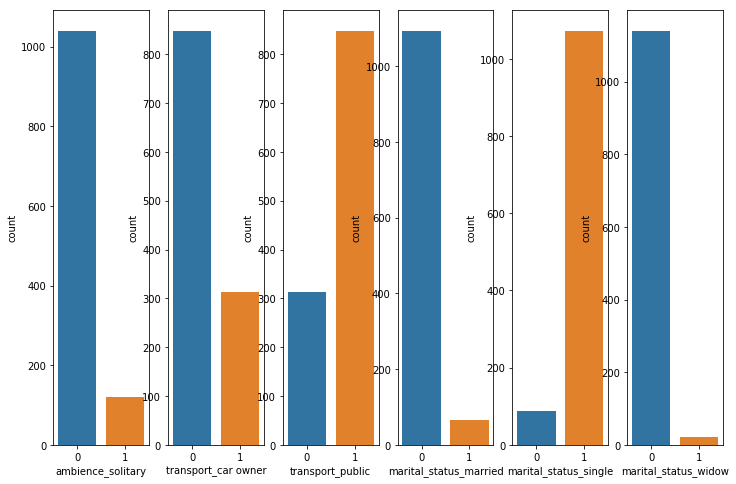

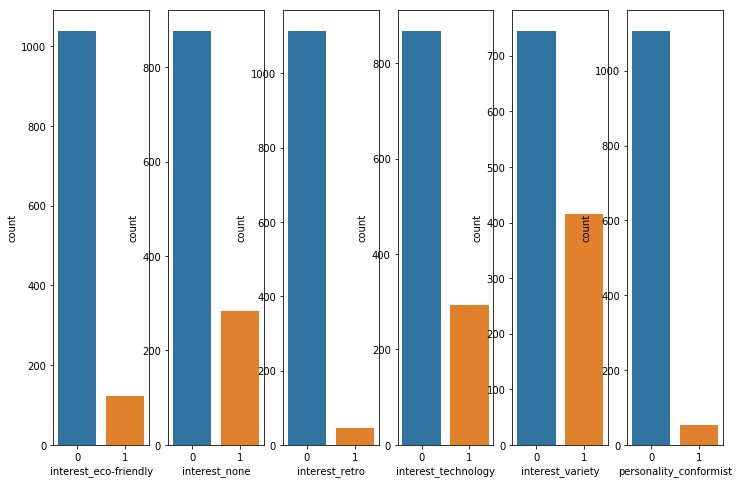

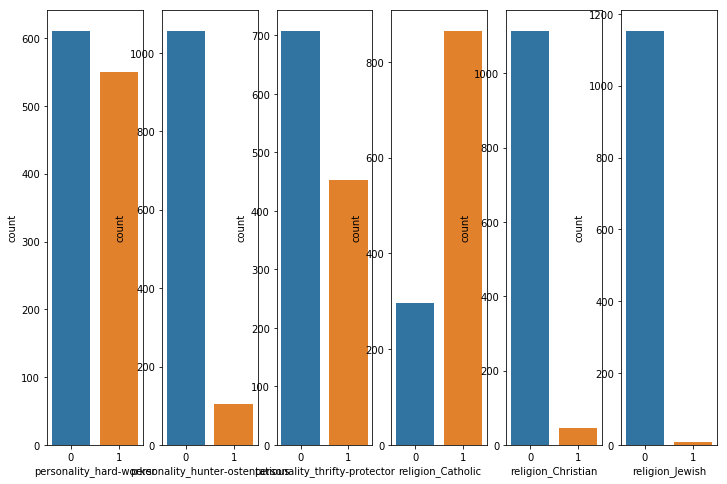

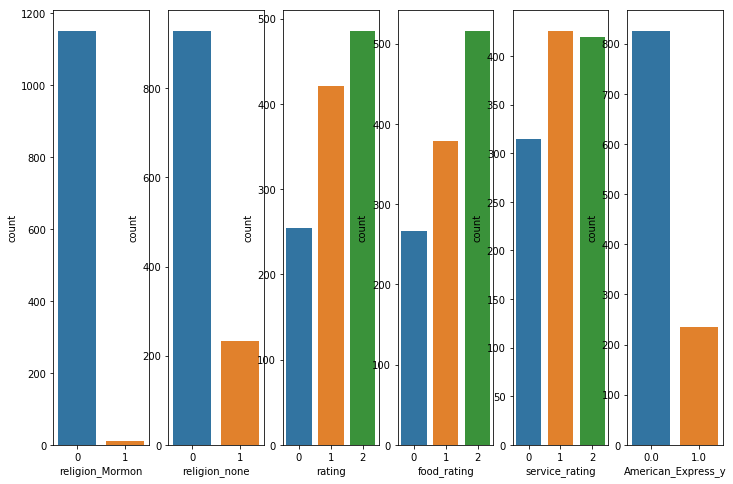

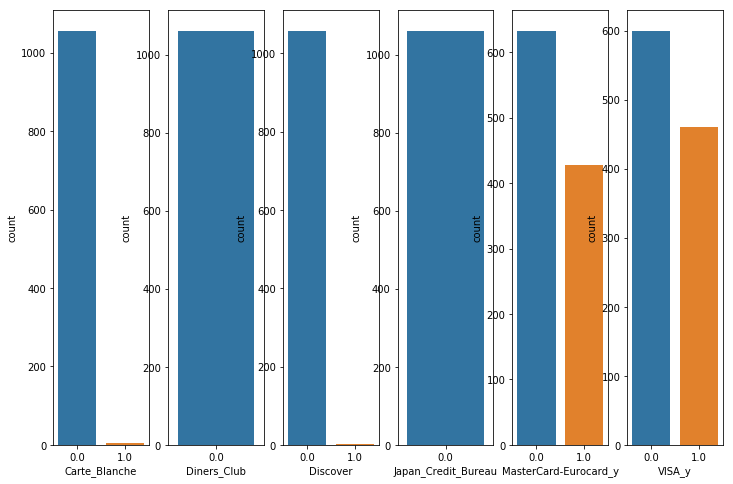

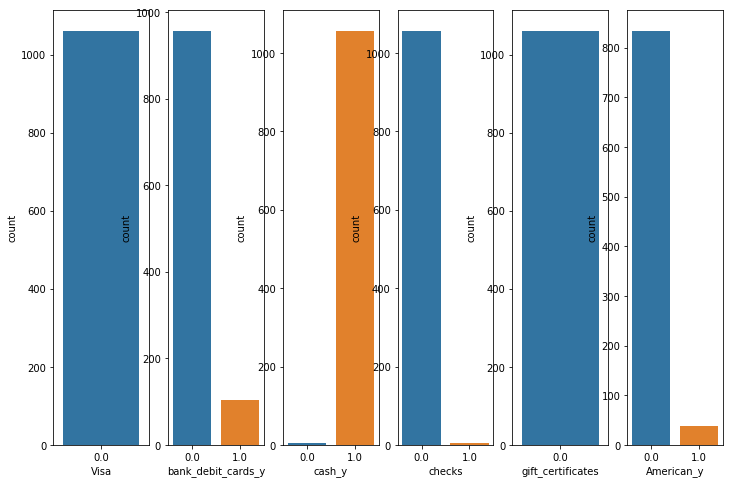

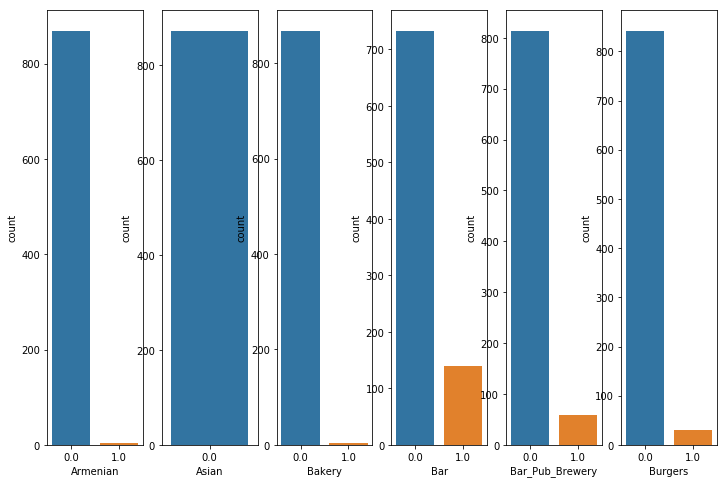

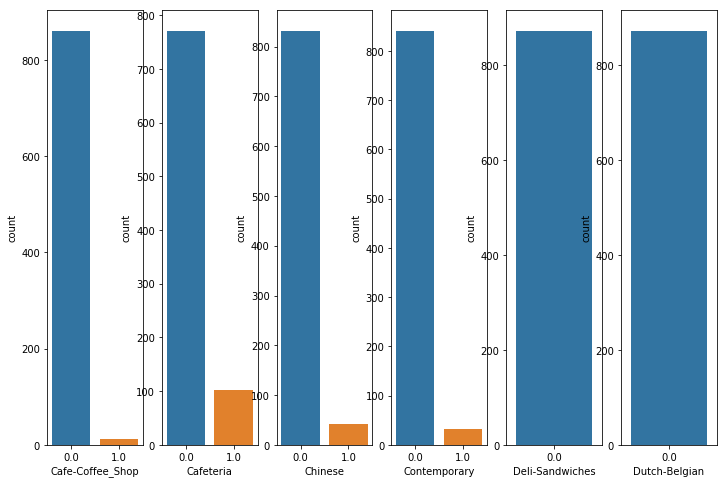

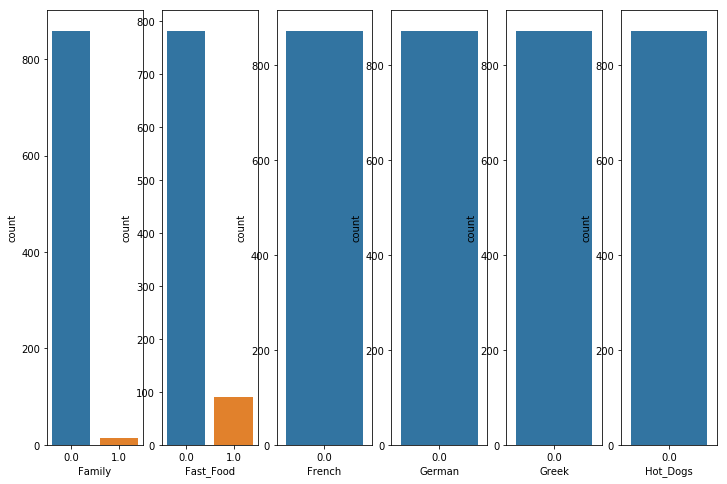

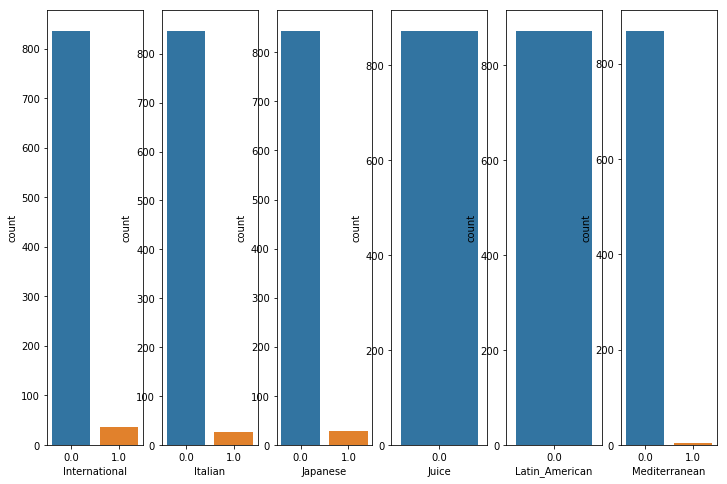

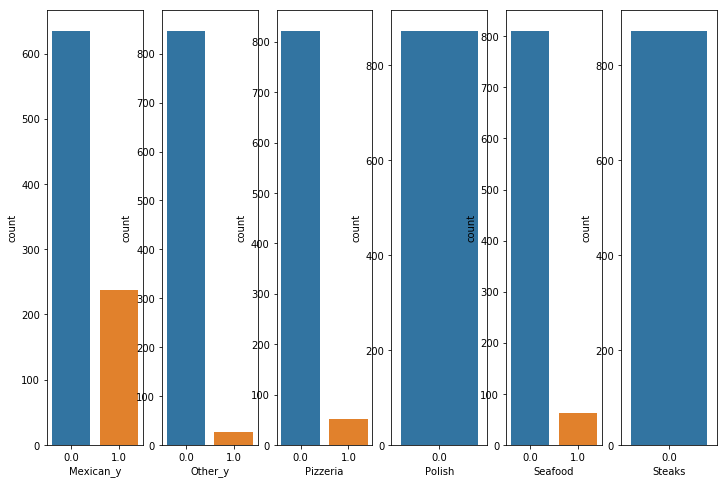

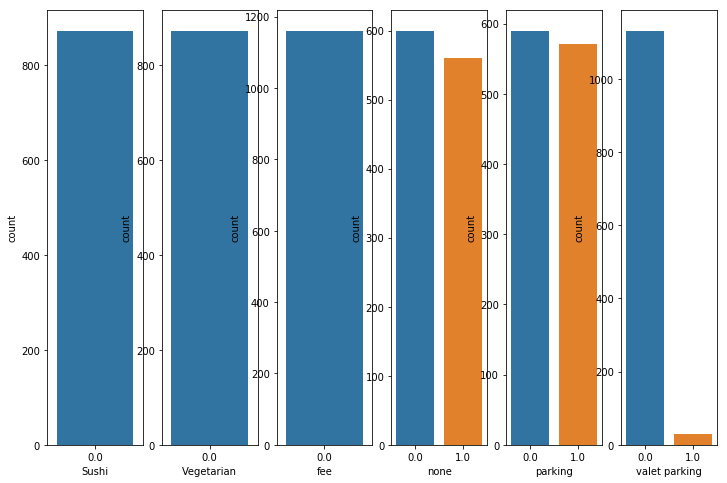

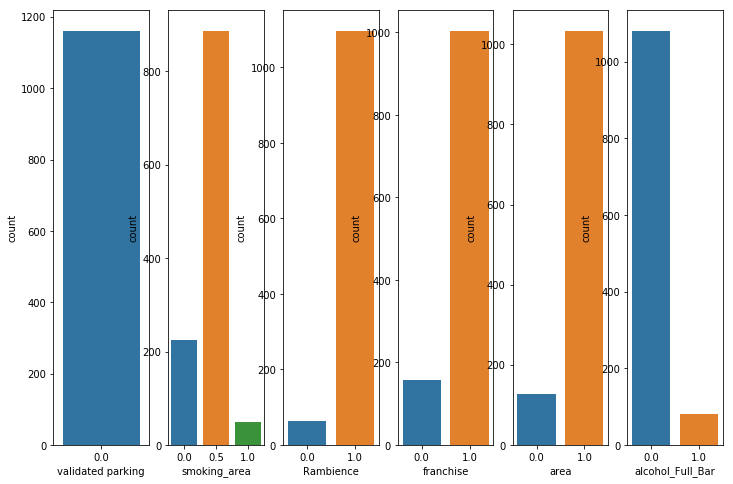

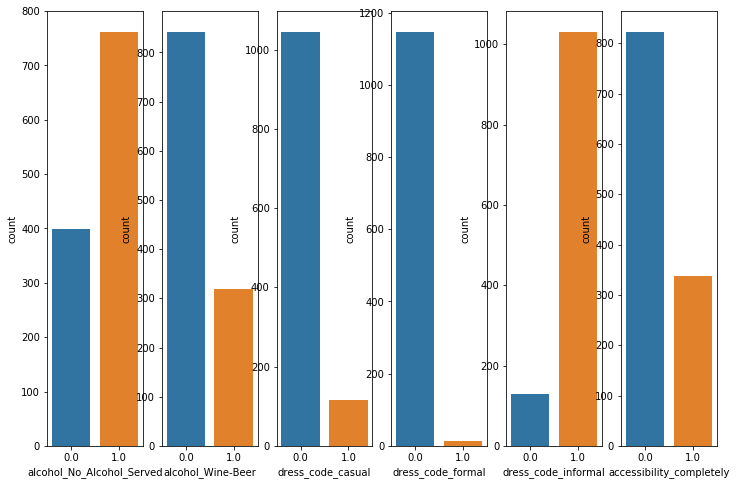

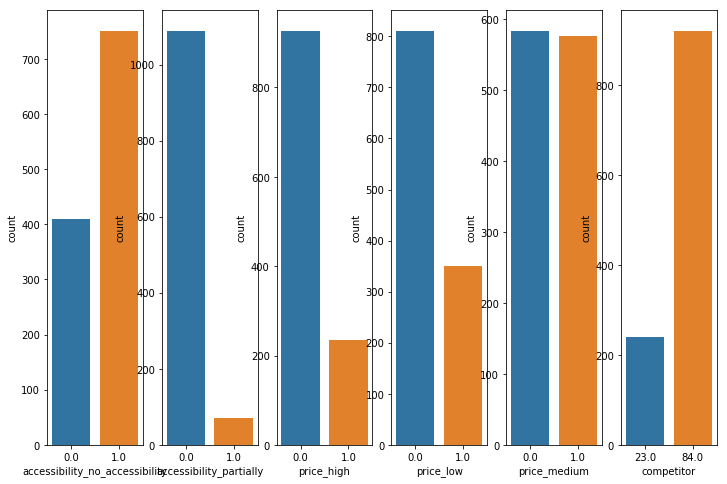

In [73]:
#Plot count plot for all attributes in a 19x6 grid
n_cols = 6
n_rows = 19
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=df, ax=ax[j])

<i>Based on the results of the graph, we are going to drop the columns with only single value. </i>

In [74]:
df.drop(columns=['Diners_Club','Japan_Credit_Bureau','Visa','gift_certificates','Asian','Deli-Sandwiches','Dutch-Belgian',\
'French','German','Greek','Hot_Dogs','Juice','Latin_American','Polish','Steaks','Sushi','Vegetarian','fee',\
'validated parking'], inplace = True)

In [75]:
df.columns

Index(['userID', 'American_x', 'Mexican_x', 'Other_x', 'American_Express_x',
       'MasterCard-Eurocard_x', 'VISA_x', 'bank_debit_cards_x', 'cash_x',
       'smoker', 'birth_year', 'activity_professional', 'activity_student',
       'activity_unemployed', 'activity_working-class', 'budget_high',
       'budget_low', 'budget_medium', 'drink_level_abstemious',
       'drink_level_drinker', 'dress_preference_formal',
       'dress_preference_informal', 'dress_preference_no preference',
       'ambience_family', 'ambience_friends', 'ambience_solitary',
       'transport_car owner', 'transport_public', 'marital_status_married',
       'marital_status_single', 'marital_status_widow',
       'interest_eco-friendly', 'interest_none', 'interest_retro',
       'interest_technology', 'interest_variety', 'personality_conformist',
       'personality_hard-worker', 'personality_hunter-ostentatious',
       'personality_thrifty-protector', 'religion_Catholic',
       'religion_Christian', 'religion_

### 10) Fill NA

Fill NA in a column with 1 if value 1 is the majority (mean of the column > = 0.5), fill NA with 0 if vlaue 0 is the majority (mean of the column < 0.5).  

In [76]:
for i in df.columns[df.isna().sum() != 0]:
    df[i].fillna(1 if df[i].mean() > 0.5 else 0, inplace = True)

In [77]:
df.isna().sum().sum()

0

### 11) Final Dataset

In [78]:
f = df[['rating', 'food_rating', 'service_rating','userID', 'placeID', 'American_x',\
         'Mexican_x', 'Other_x', 'American_Express_x',\
       'MasterCard-Eurocard_x', 'VISA_x', 'bank_debit_cards_x', 'cash_x',\
       'smoker', 'birth_year', 'activity_professional', 'activity_student',\
       'activity_unemployed', 'activity_working-class', 'budget_high',\
       'budget_low', 'budget_medium', 'drink_level_abstemious',\
       'drink_level_drinker', 'dress_preference_formal',\
       'dress_preference_informal', 'dress_preference_no preference',\
       'ambience_family', 'ambience_friends', 'ambience_solitary',\
       'transport_car owner', 'transport_public', 'marital_status_married',\
       'marital_status_single', 'marital_status_widow',\
       'interest_eco-friendly', 'interest_none', 'interest_retro',\
       'interest_technology', 'interest_variety', 'personality_conformist',\
       'personality_hard-worker', 'personality_hunter-ostentatious',\
       'personality_thrifty-protector', 'religion_Catholic',\
       'religion_Christian', 'religion_Jewish', 'religion_Mormon',\
       'religion_none', \
       'American_Express_y', 'Carte_Blanche', 'Discover',\
       'MasterCard-Eurocard_y', 'VISA_y', 'bank_debit_cards_y', 'cash_y',\
       'checks', 'American_y', 'Armenian', 'Bakery', 'Bar', 'Bar_Pub_Brewery',\
       'Burgers', 'Cafe-Coffee_Shop', 'Cafeteria', 'Chinese', 'Contemporary',\
       'Family', 'Fast_Food', 'International', 'Italian', 'Japanese',\
       'Mediterranean', 'Mexican_y', 'Other_y', 'Pizzeria', 'Seafood', 'none',\
       'parking', 'valet parking', 'smoking_area', 'Rambience', 'franchise',\
       'area', 'alcohol_Full_Bar', 'alcohol_No_Alcohol_Served',\
       'alcohol_Wine-Beer', 'dress_code_formal', 'dress_code_informal',\
       'accessibility_completely', 'accessibility_no_accessibility',\
       'accessibility_partially', 'price_high', 'price_low', 'price_medium',\
       'competitor']]

In [79]:
df.head(3)

,userID,American_x,Mexican_x,Other_x,American_Express_x,MasterCard-Eurocard_x,VISA_x,bank_debit_cards_x,cash_x,smoker,...,dress_code_casual,dress_code_formal,dress_code_informal,accessibility_completely,accessibility_no_accessibility,accessibility_partially,price_high,price_low,price_medium,competitor
0,U1001,1,0,0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,84.0
1,U1005,1,0,0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,84.0
2,U1014,0,0,1,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,84.0


## 3. Machine Learning

We detected our finding by training the following decision tree with service rating as target attribute.  

### Decision Tree

Since we have three different ratings: generating rating, food_rating,and service_rating, we will use decision tree to learn our result. <br>
For each rating, there are three levels: 0, 1, 2. Since decision tree only takes binary target values, we decide to train the tree using: 1) 0 vs (1,2), 2) 1 vs 2, and 3) 0 vs 2. Hence, for each rating (rating, food_rating, service_rating), there are three decision trees.<br>
Below we only show one decision tree of the service_rating with 3) 0 vs 2. This is the tree shows an interest split and we use this result to demonstrate our finding.(for other trees, please refer to appendix.)

In [80]:
df.drop(columns = ['userID','placeID'],inplace = True)

In [81]:
df_tree = df[df.service_rating != 1]

In [82]:
Y = df_tree.service_rating
X = df_tree.drop(columns = ['rating','food_rating','service_rating'])

In [83]:
Y.value_counts()

2    420
0    315
Name: service_rating, dtype: int64

In [84]:
dt1 = tree.DecisionTreeClassifier(max_depth=2) 

In [85]:
dt1.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

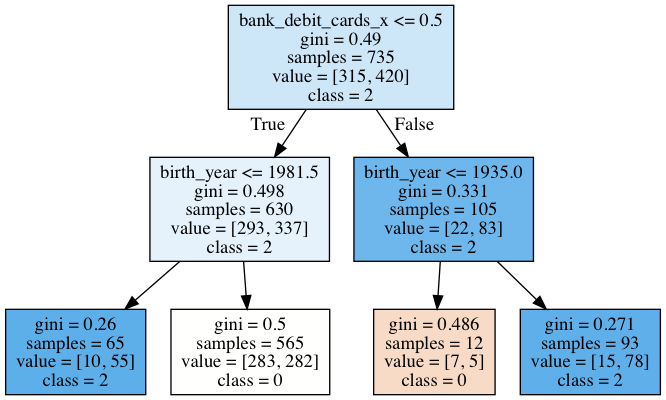

In [86]:
dt1_feature_names = list(X.columns)
dt1_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt1, out_file='tree.dot', 
    feature_names=dt1_feature_names, class_names=dt1_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## 4. Summary of Finding

We find out that customers’ debit card usages do not have an impact on the service ratings that customers give to the restaurants expect for people born after 1981 (which are mainly millennials). Whether millennials use debit card or not has a significant impact on the service ratings they give to the restaurants. Millennials who use debit cards generally give higher service ratings than millennials who do not use debit cards. However, this pattern does not appear on people born before 1981.  <br>

## 5. Validation of Finding

In [87]:
df2 = df.copy()

In [88]:
df2['binned_birth_year'] = pd.cut(df2['birth_year'],bins=[0, 1935,1981,10000])

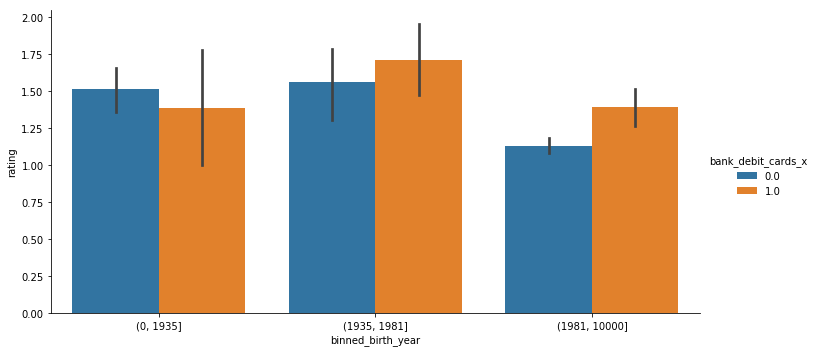

In [89]:
sns.catplot(data=df2,y='rating',x='binned_birth_year',
        kind ='bar',aspect=2, hue ='bank_debit_cards_x')

In [90]:
 df2.groupby(['bank_debit_cards_x','binned_birth_year']).rating.size()

bank_debit_cards_x  binned_birth_year
0.0                 (0, 1935]             64
                    (1935, 1981]          23
                    (1981, 10000]        921
1.0                 (0, 1935]             18
                    (1935, 1981]          21
                    (1981, 10000]        114
Name: rating, dtype: int64

## 6. Managerial Insights

Restaurant rating is important for a restaurant since a higher rating would attract more customers and generate more revenue. According to our finding, the higher rating is related more with customer factors rather than restaurant factors. In other word, if a restaurant wants to get a higher rating, the owner should target on a specific type of customers who give the higher rating. 
Based on our finding, millennials using debit cards give higher service ratings than millennials not using debit cards. Also, millennials who pay with other methods give lower service ratings compare with other age groups. We conclude that in order to obtain a higher service rating,  Restaurants should keep providing good service to all the customers while emphasizing on millennials who pay with methods other than debit cards. Possible solutions are 1)train the waiters/waitress to take better care of these millennials customers, 2)provide discounts, 3)give candies/desert at checkout, etc. 

## Appedix

### 1. Rating 

In [91]:
X = df.drop(columns = ['rating','food_rating','service_rating'])

In [92]:
df.rating.value_counts()

2    486
1    421
0    254
Name: rating, dtype: int64

#### 1 a)  0 vs (1,2)

In [93]:
Y = (df.rating != 0)*1.0

In [94]:
X.columns

Index(['American_x', 'Mexican_x', 'Other_x', 'American_Express_x',
       'MasterCard-Eurocard_x', 'VISA_x', 'bank_debit_cards_x', 'cash_x',
       'smoker', 'birth_year', 'activity_professional', 'activity_student',
       'activity_unemployed', 'activity_working-class', 'budget_high',
       'budget_low', 'budget_medium', 'drink_level_abstemious',
       'drink_level_drinker', 'dress_preference_formal',
       'dress_preference_informal', 'dress_preference_no preference',
       'ambience_family', 'ambience_friends', 'ambience_solitary',
       'transport_car owner', 'transport_public', 'marital_status_married',
       'marital_status_single', 'marital_status_widow',
       'interest_eco-friendly', 'interest_none', 'interest_retro',
       'interest_technology', 'interest_variety', 'personality_conformist',
       'personality_hard-worker', 'personality_hunter-ostentatious',
       'personality_thrifty-protector', 'religion_Catholic',
       'religion_Christian', 'religion_Jewish', '

In [95]:
Y.value_counts()

1.0    907
0.0    254
Name: rating, dtype: int64

In [96]:
dt1 = tree.DecisionTreeClassifier(max_depth=2) 

In [97]:
dt1.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

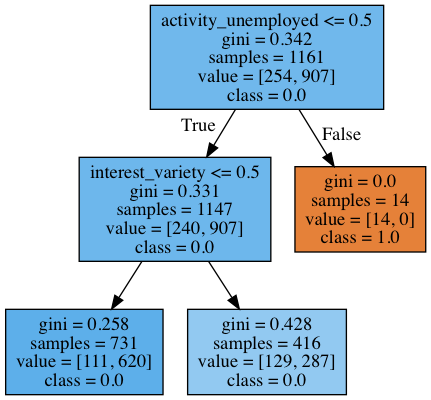

In [98]:
dt1_feature_names = list(X.columns)
dt1_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt1, out_file='tree.dot', 
    feature_names=dt1_feature_names, class_names=dt1_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

When a customer is unemployed, he or she will have low rate for all restaurants (100%). <br>


#### 1 b) 1 vs 2

In [99]:
df_12 = df[df.rating>0]

In [100]:
X = df_12.drop(columns = ['rating','food_rating','service_rating'])
Y = df_12.rating

In [101]:
dt1 = tree.DecisionTreeClassifier(max_depth=2) 

In [102]:
dt1.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

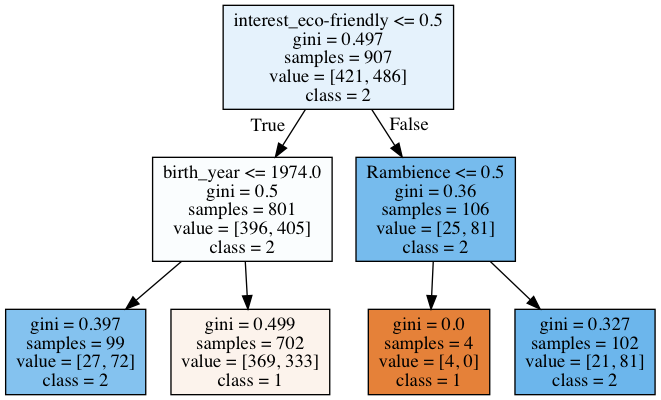

In [103]:
dt1_feature_names = list(X.columns)
dt1_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt1, out_file='tree.dot', 
    feature_names=dt1_feature_names, class_names=dt1_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# eco-friendly <= 0.5 class 2, true birth_year <= 1974  class 2, true class2, false class 1 
# eco-friendly <= 0.5 class 2, false Rambience <=0.5  class 2, true class1, false class 2

#### 1 c) 0 vs 2

In [104]:
df_13 = df[~(df.rating == 1)]

In [105]:
X = df_13.drop(columns = ['rating','food_rating','service_rating'])
Y = df_13.rating

In [106]:
df.rating.value_counts()

2    486
1    421
0    254
Name: rating, dtype: int64

In [107]:
Y.value_counts()

2    486
0    254
Name: rating, dtype: int64

In [108]:
dt_13 = tree.DecisionTreeClassifier(max_depth=2) 

In [109]:
dt_13.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

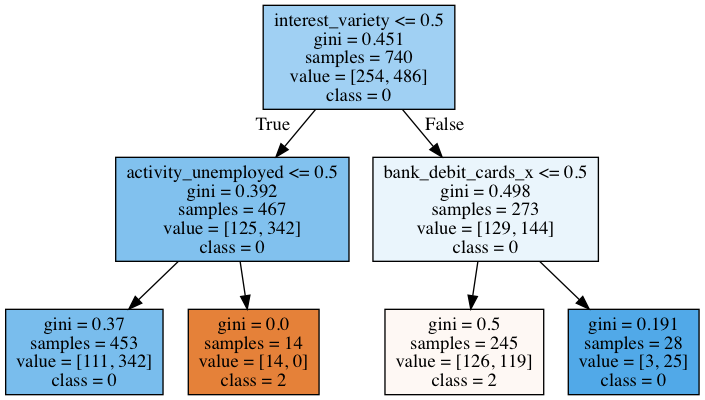

In [110]:
dt_13_feature_names = list(X.columns)
dt_13_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt_13, out_file='tree.dot', 
    feature_names=dt_13_feature_names, class_names=dt_13_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# interest_variety <= 0.5 class 0, true unemployed <=0.5  class 0, true class0, false class 2 
# interest_variety <= 0.5 class 0, false debit_cards_x <=0.5  class 0, true class2, false class 0

### 2. food rating

In [111]:
df.food_rating.value_counts()

2    516
1    379
0    266
Name: food_rating, dtype: int64

#### 2 a) 0 vs (1,2)

In [112]:
X = df.drop(columns = ['rating','food_rating','service_rating'])

In [113]:
Y = (~(df.food_rating == 0))*1

In [114]:
Y.value_counts()

1    895
0    266
Name: food_rating, dtype: int64

In [115]:
dt2 = tree.DecisionTreeClassifier(max_depth=2) 

In [116]:
dt2.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

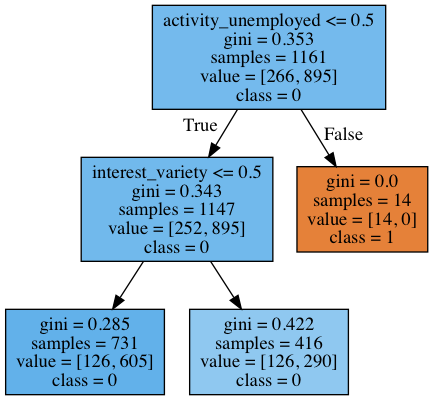

In [117]:
dt2_feature_names = list(X.columns)
dt2_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt2, out_file='tree.dot', 
    feature_names=dt2_feature_names, class_names=dt2_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# unemployed <= 0.5 class 0, true interest_variety <=0.5  class 0, true class0, false class 0    # this is NOT interest! 
# unemployed <= 0.5 class 0, false class 1 

Interpretation:

When a customer is causal drinker and born before 1990 and has a variety of interests, he or she prefer to have higher food rate. <br>
Wheb customer has variety of interest and use MasterCard-Eurocard, he or she prefer to have higher food rate.


#### 2 b) 1 vs 2

In [118]:
df_22 = df[df.food_rating>0]

In [119]:
X = df_22.drop(columns = ['rating','food_rating','service_rating'])
Y = df_22.food_rating

In [120]:
dt2 = tree.DecisionTreeClassifier(max_depth=2) 

In [121]:
dt2.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

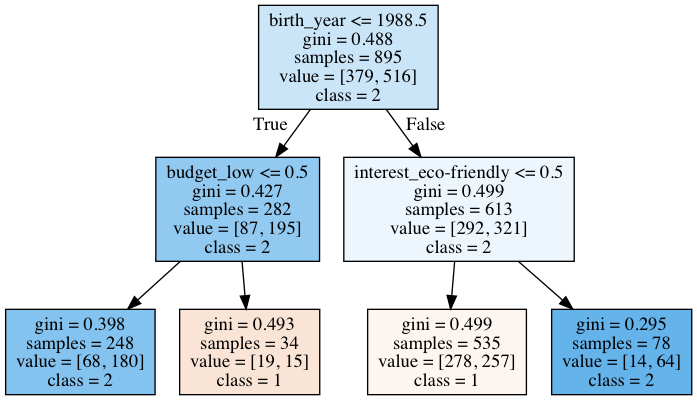

In [122]:
dt2_feature_names = list(X.columns)
dt2_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt2, out_file='tree.dot', 
    feature_names=dt2_feature_names, class_names=dt2_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# birth_year <=1988.5 class 2, true budget_low <=0.5  class 2, true class 2, false class 1
# birth_year <=1988.5 class 2, false eco-friendly <=0.5  class 2, true class1, false class 2   # This is interesting! 

Interpretation: 

When customer born before 1989 and budget is medium or high(not low), customer may have more higher faood ratings (73%). <br>
When customer born after 1989 and eco-friendly, customer may have more higher food ratings (82%).<br> 
When customer born before 1989 with low budget will rate the restuaraunt without dressing code (causal) food higher.<br>
When a cafeteria requires formal dressing, it will have higher food rating.<br><br>
Whan a customer born after 1988 and is a professsional (not eco-friendly, not comformist), he or she will rate food higher.<br>




#### 2 c) 0 vs 2

In [123]:
df_23 = df[~(df.food_rating == 1)]

In [124]:
X = df_23.drop(columns = ['rating','food_rating','service_rating'])
Y = df_23.food_rating

In [125]:
dt23 = tree.DecisionTreeClassifier(max_depth=2) 

In [126]:
dt23.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

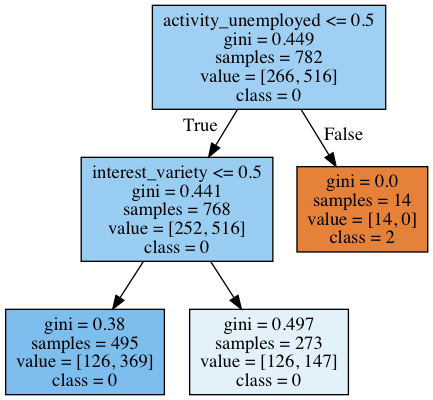

In [127]:
dt23_feature_names = list(X.columns)
dt23_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt23, out_file='tree.dot', 
    feature_names=dt23_feature_names, class_names=dt23_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# unemployed <=0.5 class 0, true interest_variety <=0.5  class 0, true class 0, false class 0   
# unemployed <=0.5 class 0, false class 2   
# this is not interesting! 

## 3. Service Rating

In [128]:
df.service_rating.value_counts()

1    426
2    420
0    315
Name: service_rating, dtype: int64

#### 0 vs (1,2)

In [129]:
X = df.drop(columns = ['rating','food_rating','service_rating'])

In [130]:
Y = (~(df.service_rating == 0))*1.0

In [131]:
dt31 = tree.DecisionTreeClassifier(max_depth=2) 

In [132]:
dt31.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

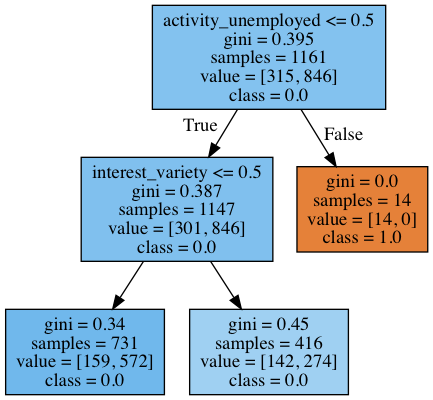

In [133]:
dt31_feature_names = list(X.columns)
dt31_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt31, out_file='tree.dot', 
    feature_names=dt31_feature_names, class_names=dt31_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# unemployed <=0.5 class 0, true interest_variety <=0.5  class 0, true class 0, false class 0   
# unemployed <=0.5 class 0, false class 1  
# this is not interesting! 

Interpretation:

#### 1 vs 2

In [134]:
df_32 = df[df.service_rating>0]

In [135]:
X = df_32.drop(columns = ['rating','food_rating','service_rating'])
Y = df_32.service_rating

In [136]:
dt32 = tree.DecisionTreeClassifier(max_depth=2) 

In [137]:
dt32.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

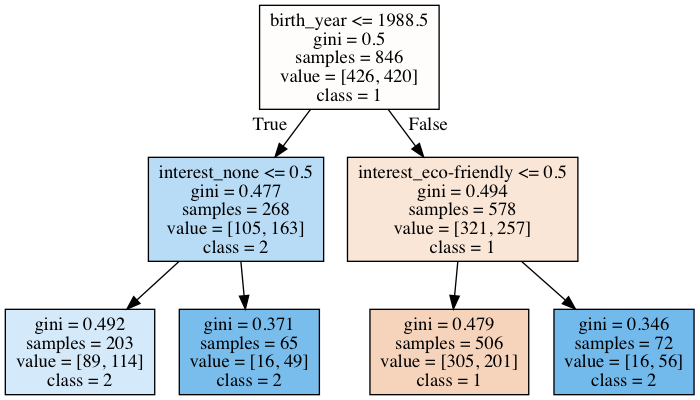

In [138]:
dt32_feature_names = list(X.columns)
dt32_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt32, out_file='tree.dot', 
    feature_names=dt32_feature_names, class_names=dt32_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# birth_year <=1988.5 class 1, true interest_none <=0.5  class 2, true class 2, false class 2   # This is not interesting
# birth_year <=1988.5 class 1, false eco-friendly <=0.5 class 1, true class 1, false class 2   # this is interesting 

#### 3 c) 0 vs 2

In [139]:
df_33 = df[~(df.service_rating == 1)]

In [140]:
X = df_33.drop(columns = ['rating','food_rating','service_rating'])
Y = df_33.service_rating

In [141]:
dt33 = tree.DecisionTreeClassifier(max_depth=2) 

In [142]:
dt33.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

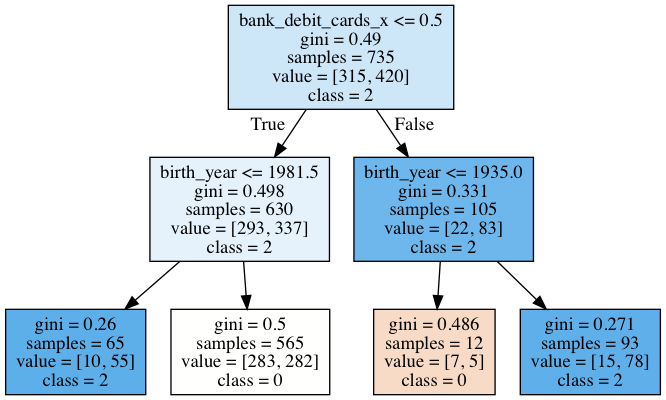

In [143]:
dt33_feature_names = list(X.columns)
dt33_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt33, out_file='tree.dot', 
    feature_names=dt33_feature_names, class_names=dt33_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# bank_debit_cards_X <=0.5 class 2, true birth_year <=1981.5  class 2, true class 2, false class 0   # This is interesting
# bank_debit_cards_X <=0.5 class 2, false birth_year <=1935.0 class 2, true class 0, false class 2   # this is interesting 